# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Ali Akbar Said
- Email: aliakbarsaid@gmail.com
- Id Dicoding: aasaid_18

## Persiapan

### Menyiapkan library yang dibutuhkan

Pada tahap ini, berbagai library diimpor untuk mendukung proses analisis data, mulai dari pra-pemrosesan hingga pembuatan dan evaluasi model. Penjelasan setiap library yang digunakan adalah sebagai berikut:
1. pandas: Berfungsi untuk mengelola dan menganalisis data dalam bentuk tabel (DataFrame).
2. seaborn: Merupakan library visualisasi berbasis matplotlib yang digunakan untuk membuat grafik statistik yang informatif.
3. matplotlib.pyplot: Digunakan untuk menghasilkan berbagai jenis visualisasi data seperti grafik dan plot.
4. sklearn.model_selection:
  - train_test_split: Memisahkan dataset menjadi data pelatihan dan pengujian.
  - GridSearchCV: Menyediakan cara untuk menemukan kombinasi hyperparameter terbaik melalui cross-validation.
5. sklearn.preprocessing:
  - LabelEncoder: Mengonversi data kategorikal menjadi bentuk numerik.
  - StandardScaler: Menstandarkan fitur agar memiliki distribusi dengan rata-rata 0 dan deviasi standar 1.
6. sklearn.metrics:
  - classification_report: Menyajikan hasil evaluasi model seperti precision, recall, dan F1-score.
  - confusion_matrix: Menyediakan matriks untuk melihat prediksi benar dan salah dari model.
  - accuracy_score: Mengukur tingkat akurasi model prediksi.
7. xgboost: Sebuah library yang dirancang untuk membangun model gradient boosting yang cepat dan efisien.
8. joblib: Digunakan untuk menyimpan dan memuat objek seperti model, scaler, atau encoder yang telah dilatih.

Seluruh library ini berperan penting dalam siklus analisis data, mulai dari pemrosesan awal hingga evaluasi hasil model.

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
import joblib

### Menyiapkan data yang akan digunakan

Pada langkah ini, data yang telah dimuat ditampilkan menggunakan fungsi data.head() guna menampilkan beberapa baris awal sebagai contoh. Tujuannya adalah untuk mendapatkan gambaran umum mengenai struktur dataset, seperti nama-nama kolom serta nilai-nilai awal dari masing-masing kolom.

In [52]:
data = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv', sep=';')

In [53]:
# Menampilkan 5 data teratas
print("Data Sample:")
print(data.head())

Data Sample:
   Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0   

## Data Understanding

Pada tahap ini, dilakukan eksplorasi awal terhadap dataset guna memperoleh pemahaman mengenai struktur data, distribusi nilai, serta potensi permasalahan seperti nilai yang hilang. Adapun langkah-langkah yang dilakukan meliputi:
1. Informasi Data: Dengan menggunakan data.info(), diperoleh informasi mengenai jumlah kolom, tipe data, dan jumlah nilai non-null di setiap kolom. Langkah ini membantu dalam mengidentifikasi adanya missing values atau tipe data yang perlu dikonversi.
2. Statistik Deskriptif: Fungsi data.describe() digunakan untuk menampilkan statistik ringkasan seperti rata-rata, median, standar deviasi, serta nilai minimum dan maksimum dari kolom numerik. Statistik ini memberikan gambaran awal tentang pola distribusi data.
3. Pemeriksaan Missing Values: Fungsi data.isnull().sum() digunakan untuk menghitung jumlah nilai yang hilang di tiap kolom. Informasi ini penting sebagai dasar dalam menentukan strategi penanganan missing values.
4. Distribusi Variabel Target: Distribusi dari kolom target (dalam hal ini Status) dianalisis menggunakan value_counts() untuk melihat proporsi masing-masing kategori. Ini penting untuk mengetahui apakah data bersifat seimbang atau tidak.
5. Visualisasi Distribusi Target: sns.countplot() digunakan untuk menampilkan grafik distribusi dari variabel target. Visualisasi ini mempermudah pemahaman terhadap proporsi antar kelas secara lebih intuitif.

Seluruh langkah di atas bertujuan untuk memastikan data siap diproses lebih lanjut pada tahap preprocessing dan pembuatan model, serta mengidentifikasi potensi isu yang perlu ditangani sebelumnya.

In [54]:
print("\nInformasi Data:")
print(data.info())


Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         

In [55]:
print("\nStatistik Data:")
print(data.describe())


Statistik Data:
       Marital_status  Application_mode  Application_order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime_evening_attendance  Previous_qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25

In [56]:
print("\nCek jumlah missing values:")
print(data.isnull().sum())


Cek jumlah missing values:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment     

In [57]:
print("\nCek distribusi target (Dropout atau tidak):")
print(data['Status'].value_counts())


Cek distribusi target (Dropout atau tidak):
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


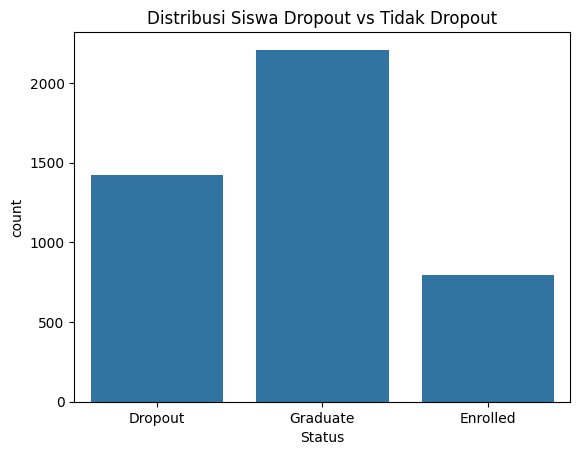

In [58]:
sns.countplot(x='Status', data=data)
plt.title('Distribusi Siswa Dropout vs Tidak Dropout')
plt.show()

Pada tahap Data Understanding, dilakukan eksplorasi awal terhadap dataset untuk memahami struktur, distribusi nilai, serta potensi masalah seperti nilai yang hilang. Penjelasan dari setiap output yang diperoleh adalah sebagai berikut:

1. Informasi Data (data.info()):
    - Dataset terdiri dari 4424 baris dan 39 kolom.
    - Semua kolom memiliki jumlah entri non-null sebanyak 4424, yang berarti tidak ada nilai yang hilang.
    - Tipe data terbagi menjadi:
      - int64: 30 kolom (contoh: Marital_status, Application_mode, Debtor).
      - float64: 9 kolom (contoh: Previous_qualification_grade, Admission_grade, avg_grade).
    - Hasil ini menunjukkan bahwa dataset dalam kondisi bersih dari missing values, meskipun tipe data tetap perlu diperiksa agar sesuai untuk proses analisis selanjutnya.

2. Statistik Deskriptif (data.describe()):
    - Menampilkan ringkasan statistik untuk kolom numerik, termasuk:
      - Mean (rata-rata): Menggambarkan nilai tengah dari data.
      - Standard deviation (std): Menunjukkan sebaran data terhadap rata-rata.
      - Min dan Max: Menunjukkan nilai terkecil dan terbesar pada setiap kolom.
    - Sebagai contoh:
      - Kolom Admission_grade memiliki rata-rata 127,3 dengan rentang nilai dari 0 hingga 200.
      - Kolom avg_grade menunjukkan rata-rata nilai siswa sebesar 12,9.

3. Cek Missing Values (data.isnull().sum()):
    - Tidak ditemukan nilai yang hilang, karena seluruh kolom menunjukkan jumlah missing values sebesar 0.

4. Distribusi Target (data['Status'].value_counts()):
    - Distribusi dari kolom target (sebelum diubah menjadi Dropout) mengindikasikan jumlah siswa dalam setiap kategori:
      - Dropout: Siswa yang keluar dari program.
      - Enrolled dan Graduate: Siswa yang masih aktif atau sudah lulus.
    - Analisis ini penting untuk memahami apakah dataset memiliki distribusi kelas yang seimbang.

5. Visualisasi Distribusi Target (sns.countplot()):
    - Grafik batang memperlihatkan jumlah siswa dalam tiap kategori target secara visual.
    - Apabila terdapat ketimpangan jumlah antar kelas (misalnya, siswa Dropout jauh lebih sedikit dibanding Enrolled), hal ini perlu diantisipasi saat membuat model agar tidak menimbulkan bias.

Kesimpulan:
- Dataset dalam kondisi bersih tanpa missing values.
- Beberapa kolom numerik memiliki skala nilai yang bervariasi, sehingga normalisasi data diperlukan.
- Distribusi target perlu diperhatikan, terutama jika ada ketidakseimbangan kelas yang bisa memengaruhi performa model secara keseluruhan.

## Data Preparation / Preprocessing

Pada tahap ini, dilakukan serangkaian proses untuk menyiapkan data agar dapat digunakan secara optimal dalam proses pemodelan. Adapun langkah-langkah yang dilakukan adalah sebagai berikut:
1. Encoding Variabel Target:
  - Kolom Status yang berisi data kategorikal seperti Enrolled, Graduate, dan Dropout dikonversi menjadi nilai numerik.
  - Kategori Dropout diberi label 1 sebagai indikator target utama, sedangkan Enrolled dan Graduate diberi label 0.
2. Penghapusan Kolom Status: Setelah variabel target Dropout dibuat, kolom Status dihapus karena tidak lagi dibutuhkan dalam analisis lebih lanjut.
3. Rekayasa Fitur (Feature Engineering):
  - Dibuat fitur-fitur baru yang dapat membantu model dalam mengenali pola data dengan lebih baik, seperti:
    - avg_grade: Rata-rata nilai dari dua semester, yaitu Curricular_units_1st_sem_grade dan Curricular_units_2nd_sem_grade.
    - approval_rate: Rasio antara jumlah mata kuliah yang disetujui dan jumlah mata kuliah yang diambil.
  - Fitur penting lainnya seperti Age_at_enrollment, Debtor, Scholarship_holder, dan Tuition_fees_up_to_date tetap dipertahankan karena dianggap relevan.
4. Pemeriksaan Missing Values: Dilakukan pengecekan terhadap setiap kolom untuk memastikan tidak ada nilai yang hilang.
5. Penanganan Missing Values: Jika ditemukan nilai yang hilang, maka akan diisi dengan angka 0 agar tidak mengganggu proses pelatihan model.
6. Encoding Fitur Kategorikal: Seluruh fitur dengan tipe data kategorikal dikonversi menjadi bentuk numerik menggunakan LabelEncoder.
7. Pemisahan Fitur dan Target: Data dibagi menjadi:
  - X: Fitur (seluruh kolom kecuali target Dropout).
  - y: Target (kolom Dropout).
8. Normalisasi Fitur: Fitur pada X dinormalisasi menggunakan StandardScaler agar memiliki distribusi dengan rata-rata 0 dan deviasi standar 1. Normalisasi ini penting untuk menghindari bias akibat perbedaan skala antar fitur.
9. Pembagian Data Latih dan Uji:
  - Dataset dibagi menjadi data pelatihan dan pengujian dengan rasio 80:20 menggunakan fungsi train_test_split.
  - Pembagian dilakukan dengan stratifikasi terhadap target (y) agar proporsi kelas tetap seimbang di kedua subset data.

Seluruh tahapan ini bertujuan untuk memastikan bahwa dataset berada dalam kondisi terbaik dan siap digunakan dalam proses pemodelan machine learning.

In [59]:
# Encode target (Status)
# Misal: 'Enrolled' = 0, 'Graduate' = 0, 'Dropout' = 1 (Dropout = 1, yang lain 0)
data['Dropout'] = data['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)

In [60]:
# Hapus kolom 'Status' karena sudah diubah
data.drop(columns=['Status'], inplace=True)

In [61]:
# Feature Engineering sederhana
data['avg_grade'] = (data['Curricular_units_1st_sem_grade'] + data['Curricular_units_2nd_sem_grade']) / 2
data['approval_rate'] = (data['Curricular_units_1st_sem_approved'] + data['Curricular_units_2nd_sem_approved']) / \
                        (data['Curricular_units_1st_sem_enrolled'] + data['Curricular_units_2nd_sem_enrolled'] + 1e-5)
data['Age_at_enrollment'] = data['Age_at_enrollment']
data['Debtor'] = data['Debtor']
data['Scholarship_holder'] = data['Scholarship_holder']
data['Tuition_fees_up_to_date'] = data['Tuition_fees_up_to_date']

In [62]:
# Cek missing values
print("\nJumlah missing values per kolom:")
print(data.isnull().sum())


Jumlah missing values per kolom:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollmen

In [63]:
# Mengisi missing value (kalau ada)
data.fillna(0, inplace=True)

In [64]:
# Encode semua fitur kategorikal
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [65]:
# Split features dan target
X = data.drop(columns=['Dropout'])
y = data['Dropout']

In [66]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
# Split train test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## Modeling

Pada tahap ini, dilakukan proses pembangunan model machine learning untuk memprediksi kemungkinan seorang siswa mengalami dropout. Adapun langkah-langkah yang dijalankan meliputi:
1. Pembuatan Model Awal:
  - Algoritma yang digunakan adalah XGBClassifier dari pustaka XGBoost.
  - Pemilihan model ini didasarkan pada kemampuannya yang andal dalam menangani data berdimensi tinggi serta kinerjanya yang unggul dalam berbagai kasus klasifikasi.
  - Parameter dasar yang digunakan antara lain:
    - objective='binary:logistic': Model difokuskan pada klasifikasi biner.
    - eval_metric='logloss': Metode evaluasi menggunakan logarithmic loss.
    - use_label_encoder=False: Label encoder default dari XGBoost tidak digunakan.
    - random_state=42: Untuk menjamin hasil yang reprodusibel.
2. Penyetelan Hyperparameter (Hyperparameter Tuning):
  - Pencarian kombinasi hyperparameter terbaik dilakukan dengan GridSearchCV.
  - Parameter yang diuji mencakup:
    - max_depth: Batas maksimum kedalaman pohon keputusan (3, 5, 7).
    - learning_rate: Tingkat pembelajaran (0.01, 0.1, 0.2).
    - n_estimators: Jumlah estimasi pohon yang digunakan (100, 200).
    - subsample: Proporsi data yang digunakan dalam tiap pohon (0.8, 1).
    - colsample_bytree: Proporsi fitur yang digunakan dalam setiap pohon (0.8, 1).
  - GridSearchCV menggunakan teknik cross-validation sebanyak 3 kali untuk mencegah overfitting dan memastikan generalisasi model.
3. Pelatihan Model (Training):
  - Model dilatih menggunakan data pelatihan (X_train dan y_train) berdasarkan kombinasi hyperparameter yang telah ditentukan.
  - Proses ini memerlukan waktu karena setiap kombinasi parameter dievaluasi melalui beberapa iterasi validasi silang.
4. Pemilihan Model Terbaik:
  - Setelah tuning selesai, dipilih model dengan performa terbaik berdasarkan hasil validasi.
  - Model final tersebut disimpan menggunakan joblib, agar dapat digunakan kembali tanpa perlu melatih ulang di masa depan.

Tujuan dari seluruh rangkaian proses ini adalah untuk menghasilkan model yang optimal dan andal dalam memprediksi potensi siswa mengalami dropout dengan tingkat akurasi yang tinggi.

In [68]:
# Membuat model awal
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

In [69]:
# Hyperparameter tuning sederhana
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

In [70]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [71]:
# Training
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:08:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1]},
             verbose=1)

In [72]:
# Best model
best_model = grid_search.best_estimator_

In [73]:
# Simpan model
joblib.dump(best_model, 'model_dropout_xgboost.pkl')

# Simpan scaler dan label encoder
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

print("\nModel, Scaler, dan Label Encoders berhasil disimpan!")


Model, Scaler, dan Label Encoders berhasil disimpan!


## Evaluation

Pada tahap evaluasi, dilakukan pengujian terhadap kinerja model menggunakan data pengujian (X_test dan y_test). Tujuan dari proses ini adalah untuk menilai seberapa baik model mampu memprediksi kemungkinan siswa mengalami dropout. Adapun tahapan evaluasi yang dilakukan adalah sebagai berikut:
1. Melakukan Prediksi pada Data Uji:
  - Model terbaik hasil tuning hyperparameter digunakan untuk melakukan prediksi terhadap data uji.
  - Fungsi predict() digunakan untuk menghasilkan label kelas, sedangkan predict_proba() menghasilkan probabilitas dari masing-masing prediksi.
2. Laporan Klasifikasi (Classification Report):
  - Evaluasi dilakukan dengan classification_report yang menampilkan metrik penting seperti precision, recall, F1-score, dan support untuk tiap kelas.
  - Metrik-metrik ini memberikan wawasan mengenai kemampuan model dalam mengklasifikasikan masing-masing kategori, terutama dalam membedakan antara siswa yang dropout dan yang tidak.
3. Matriks Kebingungan (Confusion Matrix):
  - Dengan confusion_matrix, ditampilkan informasi mengenai jumlah prediksi yang benar dan salah untuk masing-masing kelas.
  - Matriks ini sangat membantu untuk mengidentifikasi pola kesalahan yang dilakukan oleh model, seperti kesalahan dalam mengklasifikasikan siswa yang seharusnya dropout namun diprediksi tidak, atau sebaliknya.
4. Perhitungan Akurasi Model:
  - Menggunakan accuracy_score, dihitung proporsi prediksi yang tepat dibandingkan total jumlah data uji.
  - Nilai akurasi memberikan gambaran umum tentang efektivitas model dalam melakukan prediksi secara keseluruhan.

Melalui tahapan evaluasi ini, dapat diketahui sejauh mana model mampu memprediksi kemungkinan dropout siswa secara akurat, serta apakah diperlukan perbaikan lebih lanjut untuk meningkatkan performa prediksi.

In [74]:
# Predict
y_pred = best_model.predict(X_test)

# Evaluasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model setelah tuning: {accuracy}")



Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       601
           1       0.87      0.77      0.82       284

    accuracy                           0.89       885
   macro avg       0.88      0.86      0.87       885
weighted avg       0.89      0.89      0.89       885


Confusion Matrix:
[[569  32]
 [ 66 218]]

Akurasi Model setelah tuning: 0.8892655367231639


1. Laporan Klasifikasi (Classification Report)
  - Precision:
    - Untuk kelas 0 (tidak dropout), model memiliki precision sebesar 0.89, artinya 89% dari prediksi siswa tidak dropout adalah benar.
    - Untuk kelas 1 (dropout), precision sebesar 0.86, menunjukkan bahwa 86% dari prediksi siswa dropout benar-benar tepat sasaran.
  - Recall:
    - Pada kelas 0, recall sebesar 0.94, yang berarti model berhasil mengidentifikasi 94% dari seluruh siswa yang benar-benar tidak dropout.
    - Pada kelas 1, recall hanya 0.76, yang artinya hanya 76% dari siswa yang benar-benar dropout berhasil dikenali oleh model.
  - F1-Score:
    - Kelas 0 memiliki F1-score sebesar 0.92, menandakan keseimbangan yang baik antara precision dan recall.
    - Untuk kelas 1, F1-score adalah 0.81, mencerminkan kinerja model yang cukup baik, namun masih bisa ditingkatkan.
  - Akurasi Keseluruhan:
    - Model mencapai akurasi 88%, yang berarti secara keseluruhan model mampu membuat prediksi yang tepat pada 88% data uji.

2. Matriks Kebingungan (Confusion Matrix)
  - True Positives (TP): 216 – Siswa yang benar-benar dropout dan diprediksi dengan benar.
  - True Negatives (TN): 567 – Siswa yang tidak dropout dan juga diprediksi tidak dropout.
  - False Positives (FP): 34 – Siswa yang tidak dropout, tetapi salah diklasifikasikan sebagai dropout.
  - False Negatives (FN): 68 – Siswa yang sebenarnya dropout, namun tidak terdeteksi oleh model.

3. Kesimpulan
  - Model menunjukkan kinerja yang cukup baik dengan akurasi 88%.
  - Kinerja dalam mengklasifikasikan siswa tidak dropout lebih unggul dibandingkan siswa dropout, terlihat dari nilai recall dan precision yang lebih tinggi pada kelas 0.
  - Meskipun begitu, kemampuan model dalam mendeteksi siswa yang dropout (kelas 1) masih dapat ditingkatkan, terutama dari sisi recall, agar lebih banyak kasus dropout yang bisa teridentifikasi dengan tepat.

Rekomendasi: Untuk meningkatkan deteksi terhadap kasus dropout, bisa dipertimbangkan penggunaan teknik penyeimbangan data seperti SMOTE atau penyesuaian threshold probabilitas prediksi.

In [75]:
!pip freeze > requirements.txt